In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

## Health Inequality Dataset 

This data was taken from this study https://healthinequality.org/ that aimed to measure and shed light on racial and other inequalities in healthcare, and "uses big data to measure differences in life expectancy by income across areas and identify strategies to improve health outcomes for low-income Americans." 

Find the data dictionary for the inequality file [here](https://healthinequality.org/dl/health_ineq_online_table_11_readme.pdf)

Find the data dictionary for the county file [here](https://healthinequality.org/dl/health_ineq_online_table_12_readme.pdf)

### Import the Data

In [2]:
import pandas as pd
health_inequality = pd.read_csv("https://raw.githubusercontent.com/pballent/hia_255_healthinequality/main/health_inequality_dataset.csv")
health_inequality

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,le_agg_q1_F,...,cs_educ_ba,exercise_any_q1,cs_labforce,tuition,diab_eyeexam_10,gradrate_r,cur_smoke_q4,crime_total,poor_share,cbsa
0,1001,Autauga,43671,11101,Montgomery,367927,Alabama,1,AL,79.775871,...,18.000000,0.500000,0.651493,NaN,72.419628,NaN,0.133333,0.009353,0.109228,33860.0
1,1003,Baldwin,140415,11001,Mobile,599405,Alabama,1,AL,82.847725,...,23.100000,0.599432,0.598249,2055.6699,64.047822,-0.247166,0.176991,0.007371,0.101471,19300.0
2,1005,Barbour,29038,10301,Eufaula,61458,Alabama,1,AL,83.149445,...,10.900000,0.542857,0.480174,NaN,67.556468,NaN,0.111111,0.007748,0.267998,NaN
3,1009,Blount,51024,10700,Birmingham,1038182,Alabama,1,AL,81.088120,...,9.600000,0.565217,0.605729,NaN,68.155340,NaN,0.166667,0.002019,0.117428,13820.0
4,1015,Calhoun,112249,9600,LaGrange,457299,Alabama,1,AL,79.486259,...,15.200000,0.544304,0.578343,2506.3513,62.862669,-0.034474,0.182482,0.008780,0.161113,11500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,56021,Laramie,81607,27702,Cheyenne,95526,Wyoming,56,WY,80.849884,...,23.400000,0.677233,0.663209,1128.0000,66.319773,-0.226124,0.135569,0.008480,0.090975,16940.0
1555,56025,Natrona,66533,34603,Casper,78585,Wyoming,56,WY,79.617317,...,20.000000,0.675015,0.682550,1248.0000,66.987620,-0.115988,0.135472,0.009649,0.118365,16220.0
1556,56029,Park,25786,34301,Cody,37247,Wyoming,56,WY,82.349632,...,23.700001,0.661082,0.640475,1128.0000,78.021978,-0.093242,0.075881,0.004305,0.127367,NaN
1557,56033,Sheridan,26560,34304,Sheridan,46306,Wyoming,56,WY,81.758583,...,22.400000,0.673342,0.661194,1128.0000,66.043614,-0.129339,0.107623,0.006739,0.107487,43260.0


In [3]:
list(health_inequality.columns)

['cty',
 'county_name',
 'cty_pop2000',
 'cz',
 'cz_name',
 'cz_pop2000',
 'statename',
 'state_id',
 'stateabbrv',
 'le_agg_q1_F',
 'le_raceadj_q1_F',
 'le_agg_q2_F',
 'le_raceadj_q2_F',
 'le_agg_q3_F',
 'le_raceadj_q3_F',
 'le_agg_q4_F',
 'le_raceadj_q4_F',
 'le_agg_q1_M',
 'le_raceadj_q1_M',
 'le_agg_q2_M',
 'le_raceadj_q2_M',
 'le_agg_q3_M',
 'le_raceadj_q3_M',
 'le_agg_q4_M',
 'le_raceadj_q4_M',
 'sd_le_agg_q1_F',
 'sd_le_raceadj_q1_F',
 'sd_le_agg_q2_F',
 'sd_le_raceadj_q2_F',
 'sd_le_agg_q3_F',
 'sd_le_raceadj_q3_F',
 'sd_le_agg_q4_F',
 'sd_le_raceadj_q4_F',
 'sd_le_agg_q1_M',
 'sd_le_raceadj_q1_M',
 'sd_le_agg_q2_M',
 'sd_le_raceadj_q2_M',
 'sd_le_agg_q3_M',
 'sd_le_raceadj_q3_M',
 'sd_le_agg_q4_M',
 'sd_le_raceadj_q4_M',
 'count_q1_F',
 'count_q2_F',
 'count_q3_F',
 'count_q4_F',
 'count_q1_M',
 'count_q2_M',
 'count_q3_M',
 'count_q4_M',
 'exercise_any_q3',
 'intersects_msa',
 'puninsured2010',
 'score_r',
 'diab_hemotest_10',
 'ccd_pup_tch_ratio',
 'exercise_any_q4',
 'cs_ra

In [29]:
# view the data
health_inequality.head(10)

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,le_agg_q1_F,...,cs_educ_ba,exercise_any_q1,cs_labforce,tuition,diab_eyeexam_10,gradrate_r,cur_smoke_q4,crime_total,poor_share,cbsa
0,1001,Autauga,43671,11101,Montgomery,367927,Alabama,1,AL,79.775871,...,18.000000,0.500000,0.651493,NaN,72.419628,NaN,0.133333,0.009353,0.109228,33860.0
1,1003,Baldwin,140415,11001,Mobile,599405,Alabama,1,AL,82.847725,...,23.100000,0.599432,0.598249,2055.6699,64.047822,-0.247166,0.176991,0.007371,0.101471,19300.0
2,1005,Barbour,29038,10301,Eufaula,61458,Alabama,1,AL,83.149445,...,10.900000,0.542857,0.480174,NaN,67.556468,NaN,0.111111,0.007748,0.267998,NaN
3,1009,Blount,51024,10700,Birmingham,1038182,Alabama,1,AL,81.088120,...,9.600000,0.565217,0.605729,NaN,68.155340,NaN,0.166667,0.002019,0.117428,13820.0
4,1015,Calhoun,112249,9600,LaGrange,457299,Alabama,1,AL,79.486259,...,15.200000,0.544304,0.578343,2506.3513,62.862669,-0.034474,0.182482,0.008780,0.161113,11500.0
5,1017,Chambers,36583,9600,LaGrange,457299,Alabama,1,AL,80.310249,...,9.500000,0.666667,0.585549,NaN,58.539765,NaN,0.375000,0.006943,0.170360,46740.0
6,1021,Chilton,39593,10700,Birmingham,1038182,Alabama,1,AL,81.830360,...,9.900000,0.481481,0.597152,NaN,69.419643,NaN,0.222222,0.005304,0.157023,13820.0
7,1025,Clarke,27867,11001,Mobile,599405,Alabama,1,AL,83.096024,...,12.100000,0.500000,0.542532,NaN,54.264973,NaN,0.000000,0.007392,0.225882,NaN
8,1031,Coffee,43615,10302,Dothan,223605,Alabama,1,AL,81.095596,...,19.299999,0.607843,0.595883,1560.0000,63.449940,-0.030344,0.171429,0.007260,0.146959,21460.0
9,1033,Colbert,54984,6200,Florence,230941,Alabama,1,AL,82.128868,...,14.100000,0.500000,0.561961,1440.0000,58.282209,-0.254089,0.190476,0.002819,0.139600,22520.0


In [5]:
#subset the data to a smaller number of columns
hi_sub = health_inequality[[
 'statename',
 'state_id', 
 "le_agg_q1_F",
 "le_agg_q1_M",
"le_agg_q4_F",
 "le_agg_q4_M"]].copy()

In [6]:
# group by state and take mean -- NOTE: this is mean among counties not taking into account of population
mean_by_state = hi_sub.groupby("statename").mean().copy()

In [7]:
mean_by_state.sort_values("le_agg_q4_M", ascending=False)

,state_id,le_agg_q1_F,le_agg_q1_M,le_agg_q4_F,le_agg_q4_M
statename,,,,,
North Dakota,38,82.847876,76.387524,88.140584,86.850777
Utah,49,82.883244,77.837937,88.684213,86.509413
District Of Columbia,11,80.295586,74.652733,87.841988,86.448700
Colorado,8,83.541477,78.726500,88.181095,86.341647
Montana,30,83.011748,78.104045,87.788405,85.907150
Wyoming,56,80.643085,75.656905,87.077177,85.866862
Maine,23,82.892255,77.457387,87.975133,85.864396
Washington,53,82.793873,78.056068,87.957006,85.804263
New Hampshire,33,81.952760,76.631449,88.145924,85.800576


### Examine Missing Values

<AxesSubplot:>

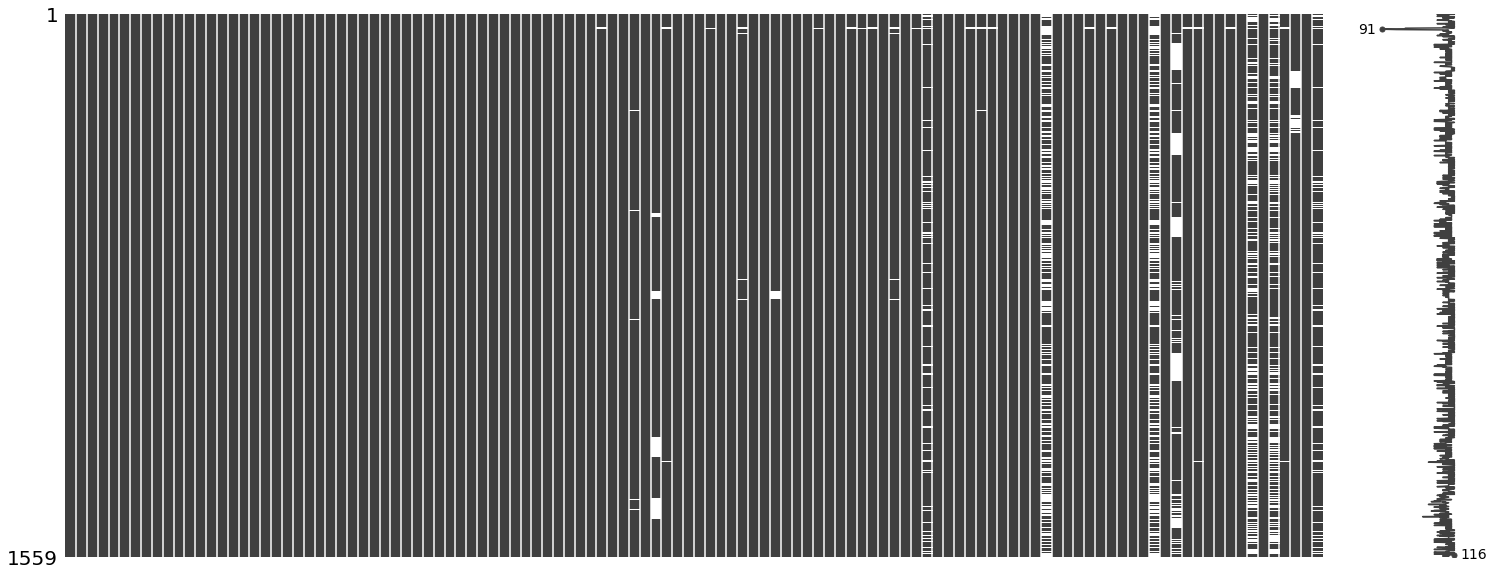

In [8]:
import missingno as msno
msno.matrix(health_inequality)

In [ ]:
### Correlation Plot Heatmaps

In [35]:
health_corr = health_inequality.corr()

# top 10 variables with highest correlation to this variable
health_corr_sorted = health_corr.sort_values(by='le_agg_q1_F', ascending=False)[:25].reset_index()
#health_corr_sorted[['index','le_raceadj_q4_q2_M_diff']]
health_corr_sorted_asc = health_corr.sort_values(by='le_agg_q1_F', ascending=True)[:25].reset_index()

In [36]:
health_corr_sorted_top25 = list(health_corr_sorted['index'])
health_corr_sorted_top25 = [i for i in health_corr_sorted_top25 if "le_" not in i and 'sd' not in i]
health_corr_sorted_top25.append("le_agg_q1_F")

In [37]:
health_corr_sorted_bottom25 = list(health_corr_sorted_asc['index'])
health_corr_sorted_bottom25 = [i for i in health_corr_sorted_bottom25 if "le_" not in i and 'sd' not in i]
health_corr_sorted_bottom25.append("le_agg_q1_F")

Text(0.5, 1.0, 'Variables with Highest Correlation Coefficient vs. Aggregate Female Life Expectancy (Q1 Income)')

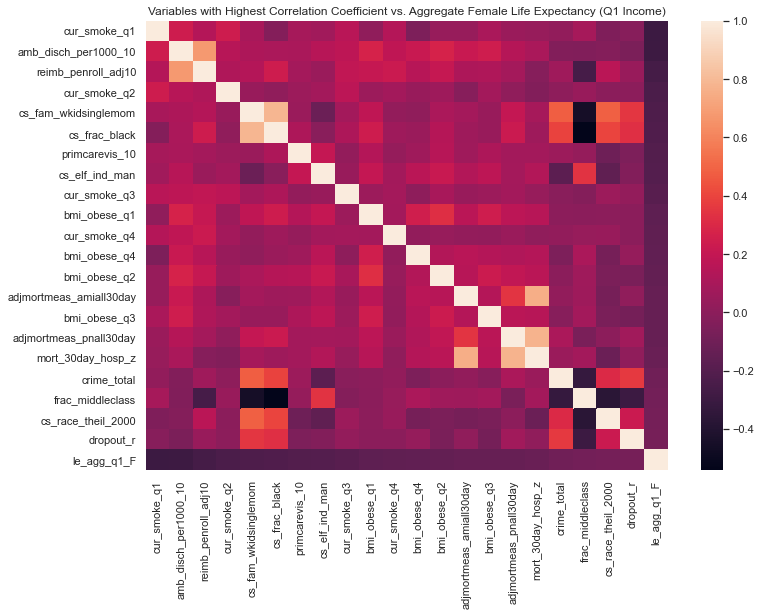

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(health_inequality[health_corr_sorted_bottom25].corr())
plt.title("Variables with Highest Correlation Coefficient vs. Aggregate Female Life Expectancy (Q1 Income)")

<AxesSubplot:title={'center':'Variables with Most Negative Correlation Coefficient vs. Aggregate Female Life Expectancy (Q1 Income)'}>

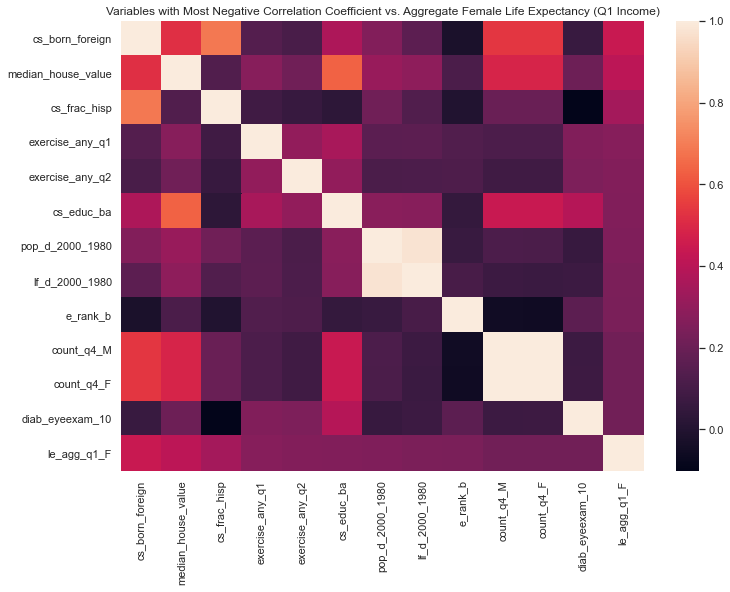

In [41]:
plt.title("Variables with Most Negative Correlation Coefficient vs. Aggregate Female Life Expectancy (Q1 Income)")
sns.heatmap(health_inequality[health_corr_sorted_top25].corr())

In [42]:
health_inequality[health_corr_sorted_bottom25].corr()['le_agg_q1_F']

cur_smoke_q1              -0.298776
amb_disch_per1000_10      -0.290878
reimb_penroll_adj10       -0.262175
cur_smoke_q2              -0.239958
cs_fam_wkidsinglemom      -0.224545
cs_frac_black             -0.219396
primcarevis_10            -0.207470
cs_elf_ind_man            -0.199552
cur_smoke_q3              -0.190173
bmi_obese_q1              -0.167454
cur_smoke_q4              -0.161161
bmi_obese_q4              -0.155994
bmi_obese_q2              -0.146928
adjmortmeas_amiall30day   -0.138026
bmi_obese_q3              -0.135155
adjmortmeas_pnall30day    -0.135118
mort_30day_hosp_z         -0.125268
crime_total               -0.099001
frac_middleclass          -0.085811
cs_race_theil_2000        -0.083813
dropout_r                 -0.076515
le_agg_q1_F                1.000000
Name: le_agg_q1_F, dtype: float64

In [44]:
health_inequality[health_corr_sorted_top25].corr()['le_agg_q1_F']

cs_born_foreign       0.443249
median_house_value    0.409698
cs_frac_hisp          0.349959
exercise_any_q1       0.271720
exercise_any_q2       0.263271
cs_educ_ba            0.260462
pop_d_2000_1980       0.256094
lf_d_2000_1980        0.243567
e_rank_b              0.242819
count_q4_M            0.221022
count_q4_F            0.219835
diab_eyeexam_10       0.218586
le_agg_q1_F           1.000000
Name: le_agg_q1_F, dtype: float64

### Examining Relationships with Scatterplot

In [45]:
health_inequality['reimb_penroll_adj10'] = health_inequality['reimb_penroll_adj10']/1000
# adjust to thousands of dollars for viz

Text(0.5, 1.0, 'Male Race Adjusted Life Expectancy (Q2) vs. Medicare $ Per Enrollee')

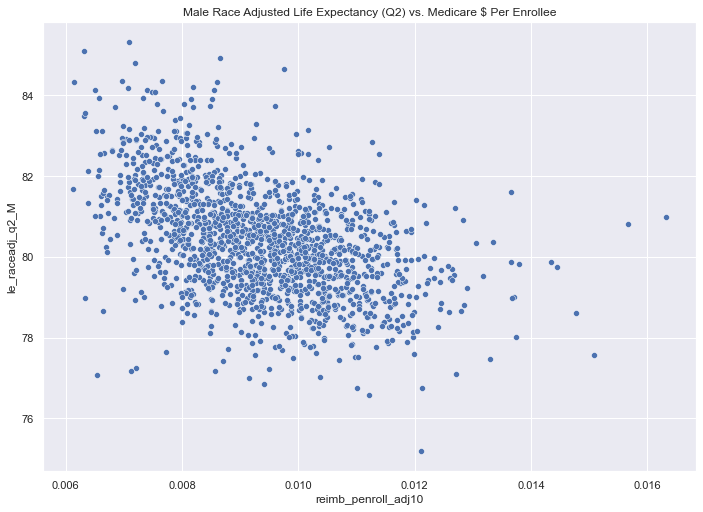

In [49]:
g = sns.scatterplot(x="reimb_penroll_adj10",y="le_raceadj_q2_M", data=health_inequality)
plt.title("Male Race Adjusted Life Expectancy (Q2) vs. Medicare $ Per Enrollee")

Text(0.5, 1.0, 'Male Race Adjusted Life Expectancy (Q2) vs. Social Capital Index')

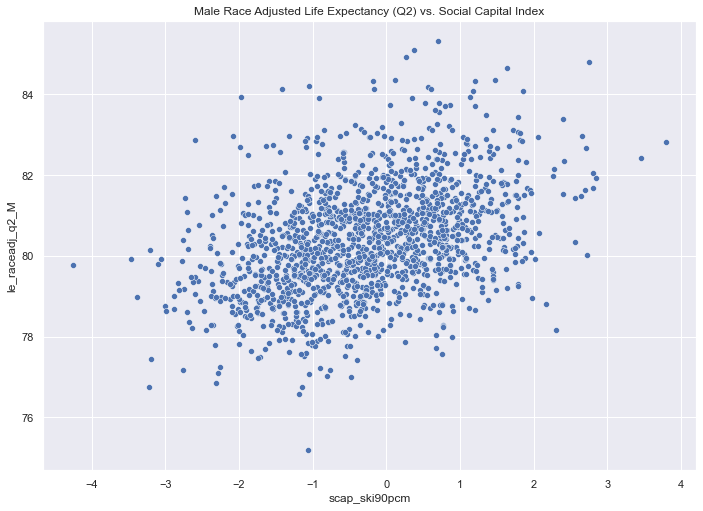

In [50]:

g = sns.scatterplot(x="scap_ski90pcm",y="le_raceadj_q2_M", data=health_inequality)
plt.title("Male Race Adjusted Life Expectancy (Q2) vs. Social Capital Index")

## Ordinary Least Squares Regression with One Variable

In [51]:
def multivariate_ols(formulatxt, df):
    mod = smf.ols(formula=formulatxt , data=df, missing='drop')
    res = mod.fit()
    print(res.summary())
    return res

In [52]:
multivariate_ols("le_raceadj_q2_M ~ reimb_penroll_adj10", health_inequality)

                            OLS Regression Results                            
Dep. Variable:        le_raceadj_q2_M   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     462.6
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           4.76e-90
Time:                        20:06:03   Log-Likelihood:                -2457.2
No. Observations:                1559   AIC:                             4918.
Df Residuals:                    1557   BIC:                             4929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              84.5755    

## Ordinary Least Squares Regression with >1 Variable

In [53]:
multivariate_ols("le_raceadj_q2_M ~ reimb_penroll_adj10 + scap_ski90pcm", health_inequality)

                            OLS Regression Results                            
Dep. Variable:        le_raceadj_q2_M   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     302.1
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.80e-111
Time:                        20:06:07   Log-Likelihood:                -2391.2
No. Observations:                1550   AIC:                             4788.
Df Residuals:                    1547   BIC:                             4805.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              83.9134    

## Logistic Regression with Dichotomous Variables

### Generate dichotomous variables

In [ ]:
def get_top_quantile_from_df(column_name, df):
    pandas_series = df['{0}'.format(column_name)]
    top_quantile = pandas_series.quantile(q=0.9)
    return top_quantile

In [ ]:
def return_dichotomous(x, threshold):
    if x >= threshold:
        return 1
    else:
        return 0 

In [ ]:
def make_dichotomous_top_quantile(column_name, df):
    col_threshold = get_top_quantile_from_df(column_name, df)
    df['dichot_top_quant_{0}'.format(column_name)] = df['{0}'.format(column_name)].apply(lambda x: return_dichotomous(x, col_threshold))
    print('dichot_top_quant_{0} has been created'.format(column_name))

In [ ]:
make_dichotomous_top_quantile('le_raceadj_q2_M', health_inequality)

In [ ]:
make_dichotomous_top_quantile('reimb_penroll_adj10', health_inequality)

In [ ]:
make_dichotomous_top_quantile('puninsured2010', health_inequality)

In [ ]:
## Examine value counts to see if roughly 10% of data has been labeled as being in the top quantile (10%)

In [ ]:
health_inequality['dichot_top_quant_le_raceadj_q2_M'].value_counts()

In [ ]:
health_inequality['dichot_top_quant_reimb_penroll_adj10'].value_counts()

### Logistic Regression with One Binary Predictor Variable

In [ ]:
# Inspired by the workbook here http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html 

def logistic_regression(formulatxt, df):
    mod = smf.glm(formula=formulatxt , data=df, missing='drop', family=sm.families.Binomial())
    res = mod.fit()
    print(res.summary())
    print("\n\n\nOdds Ratio Metrics:")
    params = res.params
    conf = res.conf_int()
    conf['Odds Ratio'] = params
    conf.columns = ['5%', '95%', 'Odds Ratio']
    print(np.exp(conf))
    return res

# This function both PRINTS results and RETURNS an object that is the actual model itself (res)

In [ ]:
res1 = logistic_regression('dichot_top_quant_le_raceadj_q2_M ~ dichot_top_quant_reimb_penroll_adj10', health_inequality)

In [ ]:
# Access an object's specific attribute 
res1.params

In [ ]:
# Access an object's specific attribute 
res1.pvalues

### Logistic Regression with Two Predictor Variables

In [ ]:
res2 = logistic_regression('dichot_top_quant_le_raceadj_q2_M ~ dichot_top_quant_reimb_penroll_adj10 + dichot_top_quant_puninsured2010', health_inequality)

In [ ]:
res2.params

In [ ]:
res2.scale

### Interpret the Probability from Logistic Regression Results

In [ ]:
import math 

def interpret_log_params(coeff):
    probability = (1 / (1 + (math.e**(-1 * coeff))))
    return ("The probability predicted by the model is {0} percent".format(round(100*probability,2)))

In [ ]:
# Probability predicted for overall counties to be in top quantile of male race adjusted life expectancy
interpret_log_params(-2.068698)

In [ ]:
# Probability predicted for overall counties to be in top quantile of male race adjusted life expectancy when a county is
# is in the top quantile of medicare reimbursement per person and  is in the top quantile of percent uninsured in 2010
interpret_log_params(-2.170341+-2.068698+-0.370200)